## Importar librerías

In [1]:
# !pip install imblearn

In [2]:
import pandas as pd
import numpy as np

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

from prettytable import PrettyTable
from matplotlib import pyplot as plt
import random
import statistics

## Importar Dataset prerpocesado

In [3]:
df = pd.read_pickle('dataset_treated.pkl')

## Desarrollo de modelos con distintas features

### Separación en sets de testeo y entrenamiento

In [4]:
X = df.copy()
X = X.drop('oid', axis=1)
X = X.drop('classALeRCE', axis=1)
y = df['classALeRCE']
test_size = 0.2

random_state = 15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify = y)

### **Modelo con features del paper**

In [5]:
features_paper = ['AndersonDarling_r', 'Gskew_r', 'Harmonics_mag_6_g', 'IAR_phi_g', 'IAR_phi_r', 'LinearTrend_g',
                  'LinearTrend_r', 'MHPS_low_g', 'MHPS_low_r', 'MHPS_ratio_g', 'MHPS_ratio_r', 'Power_rate_2',
                  'PPE', 'Skew_r', 'SPM_beta_g', 'SPM_beta_r', 'SPM_gamma_g', 'SPM_gamma_r', 'SPM_t0_g',
                  'SPM_t0_r', 'SPM_tau_fall_g', 'SPM_tau_fall_r', 'SPM_tau_rise_g', 'SPM_tau_rise_r', 'Mean_g', 'Mean_r']

In [6]:
X_train_paper = X_train[features_paper]
X_test_paper = X_test[features_paper]

#### Entrenamiento de modelo

In [7]:
macro_prec = []
macro_reca = []
macro_f1sc = []

for i in range(10):
    clf0 = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True)
    clf0.fit(X_train_paper, y_train)
    y_pred0 = clf0.predict(X_test_paper)
    report = classification_report(y_test, y_pred0, output_dict=True)
    macro_precision =  report['macro avg']['precision'] 
    macro_recall = report['macro avg']['recall']    
    macro_f1 = report['macro avg']['f1-score']
    macro_prec.append(macro_precision)
    macro_reca.append(macro_recall)
    macro_f1sc.append(macro_f1)

#### Evaluación

**Reporte de métricas**

In [8]:
print('macro_prec: ', statistics.mean(macro_prec),'+-',statistics.stdev(macro_prec))
print('macro_reca: ', statistics.mean(macro_reca),'+-',statistics.stdev(macro_reca))
print('macro_f1sc: ', statistics.mean(macro_f1sc),'+-',statistics.stdev(macro_f1sc))

macro_prec:  0.519626697041987 +- 0.011085064987070679
macro_reca:  0.6270495866386278 +- 0.02769890819536605
macro_f1sc:  0.5268012240718941 +- 0.012106010232432534


In [9]:
print(classification_report(y_test, y_pred0, target_names = clf0.classes_))

              precision    recall  f1-score   support

        SLSN       0.31      0.71      0.43         7
        SNII       0.75      0.60      0.67        73
        SNIa       0.93      0.80      0.86       286
       SNIbc       0.11      0.39      0.18        18

    accuracy                           0.74       384
   macro avg       0.52      0.63      0.53       384
weighted avg       0.84      0.74      0.78       384



**Matriz de confusión**

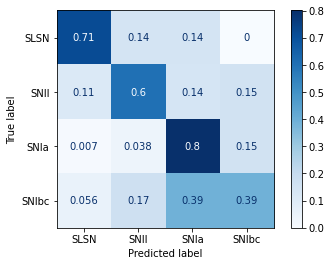

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred0, cmap=plt.cm.Blues, normalize="true")

### **Modelo con features de BRF**

In [11]:
brf_best_col = ['delta_mjd_fid_g', 'first_mag_g', 'delta_mjd_fid_r', 'first_mag_r',
                'min_mag_r', 'MHPS_ratio_g', 'MHPS_low_g', 'MHPS_high_g',
                'GP_DRW_tau_g', 'GP_DRW_sigma_r', 'Power_rate_4', 'Std_g', 'IAR_phi_g',
                'LinearTrend_g', 'AndersonDarling_r', 'MedianAbsDev_r',
                'PairSlopeTrend_r', 'Q31_r', 'Std_r', 'LinearTrend_r', 'SPM_t0_g',
                'SPM_gamma_g', 'SPM_tau_rise_g', 'SPM_tau_fall_g', 'SPM_A_r',
                'SPM_t0_r', 'SPM_gamma_r', 'SPM_beta_r', 'SPM_tau_rise_r',
                'SPM_tau_fall_r']

In [12]:
X_train_brf = X_train[brf_best_col]
X_test_brf = X_test[brf_best_col]

#### Entrenamiento de modelo

In [13]:
macro_prec = []
macro_reca = []
macro_f1sc = []

for i in range(10):
    clf = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True)
    clf.fit(X_train_brf, y_train)
    y_pred = clf.predict(X_test_brf)
    report = classification_report(y_test, y_pred, output_dict=True)
    macro_precision =  report['macro avg']['precision'] 
    macro_recall = report['macro avg']['recall']    
    macro_f1 = report['macro avg']['f1-score']
    macro_prec.append(macro_precision)
    macro_reca.append(macro_recall)
    macro_f1sc.append(macro_f1)

#### Evaluación

**Reporte de métricas**

In [14]:
print('macro_prec: ', statistics.mean(macro_prec),'+-',statistics.stdev(macro_prec))
print('macro_reca: ', statistics.mean(macro_reca),'+-',statistics.stdev(macro_reca))
print('macro_f1sc: ', statistics.mean(macro_f1sc),'+-',statistics.stdev(macro_f1sc))

macro_prec:  0.5310480527676456 +- 0.02378567957875571
macro_reca:  0.6725975128372388 +- 0.042843386319221424
macro_f1sc:  0.5464098740222505 +- 0.026352520281537905


In [15]:
print(classification_report(y_test, y_pred, target_names = clf.classes_))

              precision    recall  f1-score   support

        SLSN       0.26      0.71      0.38         7
        SNII       0.68      0.64      0.66        73
        SNIa       0.93      0.74      0.83       286
       SNIbc       0.09      0.33      0.14        18

    accuracy                           0.71       384
   macro avg       0.49      0.61      0.50       384
weighted avg       0.83      0.71      0.75       384



**Matriz de confusión**

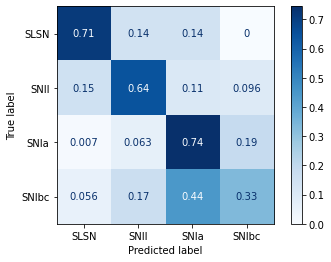

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, normalize="true")

### **Modelo con features sin correlación**

In [17]:
nocorr_best_col = ['delta_mag_fid_g', 'delta_mjd_fid_g', 'first_mag_g', 'min_mag_g',
                   'n_det_g', 'delta_mag_fid_r', 'first_mag_r', 'MHPS_ratio_g',
                   'MHPS_ratio_r', 'MHPS_high_r', 'Multiband_period', 'GP_DRW_tau_g',
                   'GP_DRW_tau_r', 'Psi_CS_g', 'Psi_CS_r', 'Psi_eta_r', 'iqr_r',
                   'Amplitude_g', 'Amplitude_r', 'Pvar_r', 'SPM_t0_g', 'SPM_gamma_g',
                   'SPM_tau_rise_g', 'SPM_t0_r', 'SPM_gamma_r', 'SPM_beta_r',
                   'SPM_tau_rise_r', 'SPM_tau_fall_r', 'sgscore1']

In [18]:
X_train_nocorr = X_train[nocorr_best_col]
X_test_nocorr = X_test[nocorr_best_col]

#### Entrenamiento del modelo

In [19]:
macro_prec = []
macro_reca = []
macro_f1sc = []

for i in range(10):
    clf2 = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True)
    clf2.fit(X_train_nocorr, y_train)
    y_pred2 = clf2.predict(X_test_nocorr)
    report = classification_report(y_test, y_pred2, output_dict=True)
    macro_precision =  report['macro avg']['precision'] 
    macro_recall = report['macro avg']['recall']    
    macro_f1 = report['macro avg']['f1-score']
    macro_prec.append(macro_precision)
    macro_reca.append(macro_recall)
    macro_f1sc.append(macro_f1)

#### Evaluación

**Reporte de métricas**

In [20]:
print('macro_prec: ', statistics.mean(macro_prec),'+-',statistics.stdev(macro_prec))
print('macro_reca: ', statistics.mean(macro_reca),'+-',statistics.stdev(macro_reca))
print('macro_f1sc: ', statistics.mean(macro_f1sc),'+-',statistics.stdev(macro_f1sc))

macro_prec:  0.4892560954119064 +- 0.019022056938300107
macro_reca:  0.6119971732985432 +- 0.028889360479258133
macro_f1sc:  0.5035292805644817 +- 0.017813127148551437


In [21]:
print(classification_report(y_test, y_pred2, target_names = clf2.classes_))

              precision    recall  f1-score   support

        SLSN       0.31      0.71      0.43         7
        SNII       0.71      0.62      0.66        73
        SNIa       0.91      0.75      0.82       286
       SNIbc       0.07      0.28      0.12        18

    accuracy                           0.70       384
   macro avg       0.50      0.59      0.51       384
weighted avg       0.82      0.70      0.75       384



**Matriz de confusión**

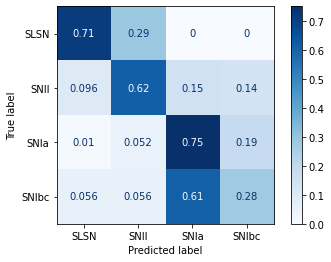

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap=plt.cm.Blues, normalize="true")

### **Modelo con features de RFE**

In [23]:
rfe_best_col = ['delta_mjd_fid_g', 'first_mag_g', 'delta_mjd_fid_r',
                'first_mag_r', 'min_mag_r', 'MHPS_ratio_g', 'MHPS_high_g',
                'MHPS_high_r', 'GP_DRW_tau_g', 'GP_DRW_tau_r', 'Skew_g', 'Amplitude_r',
                'Gskew_r', 'Meanvariance_r', 'MedianAbsDev_r', 'PairSlopeTrend_r',
                'StetsonK_r', 'LinearTrend_r', 'SPM_t0_g', 'SPM_gamma_g', 'SPM_beta_g',
                'SPM_tau_rise_g', 'SPM_tau_fall_g', 'SPM_A_r', 'SPM_t0_r',
                'SPM_gamma_r', 'SPM_beta_r', 'SPM_tau_rise_r', 'SPM_tau_fall_r',
                'sgscore1']

In [24]:
X_train_rfe = X_train[rfe_best_col]
X_test_rfe = X_test[rfe_best_col]

#### Entrenamiento del modelo

In [25]:
macro_prec = []
macro_reca = []
macro_f1sc = []

for i in range(10):
    clf = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True)
    clf.fit(X_train_rfe, y_train)
    y_pred3 = clf.predict(X_test_rfe)
    report = classification_report(y_test, y_pred3, output_dict=True)
    macro_precision =  report['macro avg']['precision'] 
    macro_recall = report['macro avg']['recall']    
    macro_f1 = report['macro avg']['f1-score']
    macro_prec.append(macro_precision)
    macro_reca.append(macro_recall)
    macro_f1sc.append(macro_f1)

#### Evaluación

**Reporte de métricas**

In [26]:
print('macro_prec: ', statistics.mean(macro_prec),'+-',statistics.stdev(macro_prec))
print('macro_reca: ', statistics.mean(macro_reca),'+-',statistics.stdev(macro_reca))
print('macro_f1sc: ', statistics.mean(macro_f1sc),'+-',statistics.stdev(macro_f1sc))

macro_prec:  0.523100576951018 +- 0.0173177495148842
macro_reca:  0.6471993379527626 +- 0.029578069524490307
macro_f1sc:  0.5326310859377088 +- 0.022528825085366317


In [27]:
print(classification_report(y_test, y_pred3, target_names = clf.classes_))

              precision    recall  f1-score   support

        SLSN       0.32      1.00      0.48         7
        SNII       0.79      0.63      0.70        73
        SNIa       0.93      0.79      0.85       286
       SNIbc       0.10      0.33      0.15        18

    accuracy                           0.74       384
   macro avg       0.53      0.69      0.55       384
weighted avg       0.85      0.74      0.78       384



**Matriz de confusión**

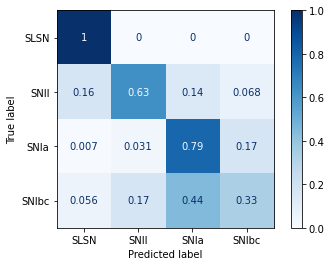

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3, cmap=plt.cm.Blues, normalize="true")